<h2>Problem: Since youtube has phased out the search by categories function ,I have used Youtube Data Api to parse out videos by 
category from the Popular Page and find out the outliers.With that, we can study the charcteristics of what make a youtube video peform above expectations or below expectations</h2>
<h3>With that,we can make better decisons when creating youtube videos.</h3>



<center><img src= https://assets.stickpng.com/images/580b57fcd9996e24bc43c545.png alt ="youtube" width=200px height=auto></center>
<h1> Studying the data of the top videos in the Youtube  Popular page based on category to 
 find out if there are any outliers</h1>
 

<h2 color = "blue">Initialization</h2>

In [1]:
import numpy as np
import pandas as pd
from helpers import UserResponse
from helpers import ApiResponse
import seaborn as sns


<h2>Sample Input for user</h2>
<ul>
<li> Gaming</li>
<li> Comedy</li>
<li>News & Politics</li>
</ul>

[If you want to learn more expected inputs](https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/)





<h2> Querying for user data</h2>
<span>Check for category that user want to analyse</span>


In [2]:
# Get user response and carry out
# the autocorrect function on it
user = UserResponse()
category = user.get_category()
print(category)

('23', 'Comedy')


<h2> Getting Response from the Youtube Api<h2>

In [3]:
# Get Response from API by creating a response object
response = ApiResponse(category[0])
# Get snippet data from youtube API
content_result = response.scrape_for_videos().scrape_for_content("snippet")
df = pd.json_normalize(data=content_result["items"])
# Get statistics data from youtube API
stats_result = response.scrape_for_content("statistics")
df_stats = pd.json_normalize(data=stats_result["items"])
# Join both statistics and snippet data into one table
df_table =df.merge(df_stats,on="id")
df_table

,kind_x,etag_x,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,snippet.localized.description,snippet.defaultAudioLanguage,snippet.tags,kind_y,etag_y,statistics.viewCount,statistics.likeCount,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount
0,youtube#video,YDzoTdROi2oeMnur0WZhi_aHInc,8APZIVR39hQ,2020-11-26T14:58:13Z,UCdtNjOwfQpgVK0FyOeLyzrg,Thanksgiving with the Tyson's,Pre-order the fight now at TysonOnTriller.com,https://i.ytimg.com/vi/8APZIVR39hQ/default.jpg,120,90,...,Pre-order the fight now at TysonOnTriller.com,en,NaN,youtube#video,qQ8J5bDpI7AIbiS65fv0zmfu_OQ,446900,16436,271,0,1822
1,youtube#video,bDanlqYj2XaXavn8yB_vLvUXmcE,ec9uZSXqBfY,2020-11-24T17:00:00Z,UCwtnkRZcvL4bfopzJ-Von8Q,We Tested Viral Tik Tok Hacks to see if they w...,We tried these viral Tik Tok hacks to see if t...,https://i.ytimg.com/vi/ec9uZSXqBfY/default.jpg,120,90,...,We tried these viral Tik Tok hacks to see if t...,en,"[Merrell Twins, Twins, Merrell, Veronica Merre...",youtube#video,d112t1zZR_bGdryE_oS3i-0ig9c,2340430,49692,3061,0,5099
2,youtube#video,EYYLkgP2OjIK7hpJT3Ca74mS1Js,Ya3YkK0tkUU,2020-11-25T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Make Plushies Without Instructions,We can't believe our Tryceratops Plushies sold...,https://i.ytimg.com/vi/Ya3YkK0tkUU/default.jpg,120,90,...,We can't believe our Tryceratops Plushies sold...,en,"[try guys, keith, ned, zach, eugene, habersber...",youtube#video,zxuSCYP2NGnS49ccmQCQGe4186c,1903450,95586,1113,0,8379
3,youtube#video,_R3FtKNl2ln7kyX9I2RbvFkfQF0,Ayk9jj-7zAk,2020-11-24T17:15:01Z,UCJLKwTg0IaSMoq6hLHT3CAA,A Very Moist Thanksgiving Sausage Special,Join @penguinz0 and me as we make celebrate Th...,https://i.ytimg.com/vi/Ayk9jj-7zAk/default.jpg,120,90,...,Join @penguinz0 and me as we make celebrate Th...,NaN,NaN,youtube#video,2Xwjtkq1xAjtIe6t0SeWlHzFvMg,416113,67645,265,0,7920
4,youtube#video,eTFyc0AnKNLTPSlwuOFWEGg6Wyc,9dvyybO4JmU,2020-11-24T20:31:06Z,UCnZx--LpG2spgmlxOcC-DRA,more fonky for your chonky,Get the best discount of the year on Raycons! ...,https://i.ytimg.com/vi/9dvyybO4JmU/default.jpg,120,90,...,Get the best discount of the year on Raycons! ...,en,"[fonky chonky, funky piano, when musicians rag...",youtube#video,9I6qWeEkszgsfoAuaD3_op24fro,564437,77803,420,0,8293
5,youtube#video,6IClou8--GlzlInNfKEcf8iNkOg,3YXUWWZJXpE,2020-11-23T17:10:18Z,UCs7yDP7KWrh0wd_4qbDP32g,Welcome To My Parents' House - NSP,Listen to the album on Spotify: https://spoti....,https://i.ytimg.com/vi/3YXUWWZJXpE/default.jpg,120,90,...,Listen to the album on Spotify: https://spoti....,NaN,NaN,youtube#video,Hn_QW81Z7HDgSqp3TsXcUVgBBD8,809209,92255,309,0,6606
6,youtube#video,re3uPK5lqMcn_-SkOv3RrFOR3kQ,ncvA8_H-wkQ,2020-11-22T17:19:41Z,UCo8bcnLyZH8tBIH9V1mLgqQ,I'm a Mobile Game,It's a great Christmas Present that you don't ...,https://i.ytimg.com/vi/ncvA8_H-wkQ/default.jpg,120,90,...,It's a great Christmas Present that you don't ...,en,"[mobile game, lets bounce, video game, theodd1...",youtube#video,YSX8Qjq5ecSoyLoNUbB-kdTQLrg,5311313,269509,8939,0,42255
7,youtube#video,3T2u9wMnPjgKLGOLaD4O0_Pg6lg,Hzfw-EX2XvQ,2020-11-24T16:00:03Z,UCYzPXprvl5Y-Sf0g4vX-m6g,Bad IRISH ACCENTS That Even I Can't Understand,Irish accents are beautiful and diverse but so...,https://i.ytimg.com/vi/Hzfw-EX2XvQ/default.jpg,120,90,...,Irish accents are beautiful and diverse but so...,en,[jacksepticeye],youtube#video,3kosxQ7MumvSM51u8TXJgDLEcyw,2197355,240693,902,0,16818
8,youtube#video,btTgctxSRjHbH_d059rb4LoxY28,qPMyJ5_1ASc,2020-11-23T17:30:02Z,UCuo9VyowIT-ljA5G2ZuC6Yw,Anti-Smoking Campaigns on Tik Tok,Go to https://buyraycon.com/eddy for 15% off\n...,https://i.ytimg.com/vi/qPMyJ5_1ASc/default.jpg,120,90,...,Go to https://buyraycon.com/eddy for 15% off\n...,en,NaN,youtube#video,dzM8s4g5otAWrBB4TBFa6b0DI8s,467003,53245,491,0,6010
9,youtube#video,Qa89F05ngMCBOcf5-XTjzELEEMw,WAsFLsG0qPY,2020-11-22T19:

<h2> Data Cleaning</h2>
<ul>
<li>Drop Irrelevent Columns and columns with Na Values</li>
<li>Include Category Column to show data more clearly</li>
</ul>

In [4]:
# Drop Irrelevant Columns
for column in df_table.columns:
    if"snippet.thumbnails" in column or "etag"in column or"kind" in column:
        df_table.drop(column, axis = 1, inplace=True)
# Place Category Column so that users know what categort we are 
# looking at
df_table["category"] = category[1]
df_table.fillna("Not Stated",inplace=True)
df_table

,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.channelTitle,snippet.categoryId,snippet.liveBroadcastContent,snippet.defaultLanguage,snippet.localized.title,snippet.localized.description,snippet.defaultAudioLanguage,snippet.tags,statistics.viewCount,statistics.likeCount,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,category
0,8APZIVR39hQ,2020-11-26T14:58:13Z,UCdtNjOwfQpgVK0FyOeLyzrg,Thanksgiving with the Tyson's,Pre-order the fight now at TysonOnTriller.com,Mike Tyson,23,none,en,Thanksgiving with the Tyson's,Pre-order the fight now at TysonOnTriller.com,en,Not Stated,446900,16436,271,0,1822,Comedy
1,ec9uZSXqBfY,2020-11-24T17:00:00Z,UCwtnkRZcvL4bfopzJ-Von8Q,We Tested Viral Tik Tok Hacks to see if they w...,We tried these viral Tik Tok hacks to see if t...,merrelltwins,23,none,Not Stated,We Tested Viral Tik Tok Hacks to see if they w...,We tried these viral Tik Tok hacks to see if t...,en,"[Merrell Twins, Twins, Merrell, Veronica Merre...",2340430,49692,3061,0,5099,Comedy
2,Ya3YkK0tkUU,2020-11-25T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Make Plushies Without Instructions,We can't believe our Tryceratops Plushies sold...,The Try Guys,23,none,en,The Try Guys Make Plushies Without Instructions,We can't believe our Tryceratops Plushies sold...,en,"[try guys, keith, ned, zach, eugene, habersber...",1903450,95586,1113,0,8379,Comedy
3,Ayk9jj-7zAk,2020-11-24T17:15:01Z,UCJLKwTg0IaSMoq6hLHT3CAA,A Very Moist Thanksgiving Sausage Special,Join @penguinz0 and me as we make celebrate Th...,Ordinary Sausage,23,none,Not Stated,A Very Moist Thanksgiving Sausage Special,Join @penguinz0 and me as we make celebrate Th...,Not Stated,Not Stated,416113,67645,265,0,7920,Comedy
4,9dvyybO4JmU,2020-11-24T20:31:06Z,UCnZx--LpG2spgmlxOcC-DRA,more fonky for your chonky,Get the best discount of the year on Raycons! ...,Daniel Thrasher,23,none,Not Stated,more fonky for your chonky,Get the best discount of the year on Raycons! ...,en,"[fonky chonky, funky piano, when musicians rag...",564437,77803,420,0,8293,Comedy
5,3YXUWWZJXpE,2020-11-23T17:10:18Z,UCs7yDP7KWrh0wd_4qbDP32g,Welcome To My Parents' House - NSP,Listen to the album on Spotify: https://spoti....,Ninja Sex Party,23,none,Not Stated,Welcome To My Parents' House - NSP,Listen to the album on Spotify: https://spoti....,Not Stated,Not Stated,809209,92255,309,0,6606,Comedy
6,ncvA8_H-wkQ,2020-11-22T17:19:41Z,UCo8bcnLyZH8tBIH9V1mLgqQ,I'm a Mobile Game,It's a great Christmas Present that you don't ...,TheOdd1sOut,23,none,Not Stated,I'm a Mobile Game,It's a great Christmas Present that you don't ...,en,"[mobile game, lets bounce, video game, theodd1...",5311313,269509,8939,0,42255,Comedy
7,Hzfw-EX2XvQ,2020-11-24T16:00:03Z,UCYzPXprvl5Y-Sf0g4vX-m6g,Bad IRISH ACCENTS That Even I Can't Understand,Irish accents are beautiful and diverse but so...,jacksepticeye,23,none,Not Stated,Bad IRISH ACCENTS That Even I Can't Understand,Irish accents are beautiful and diverse but so...,en,[jacksepticeye],2197355,240693,902,0,16818,Comedy
8,qPMyJ5_1ASc,2020-11-23T17:30:02Z,UCuo9VyowIT-ljA5G2ZuC6Yw,Anti-Smoking Campaigns on Tik Tok,Go to https://buyraycon.com/eddy for 15% off\n...,Eddy Burback,23,none,Not Stated,Anti-Smoking Campaigns on Tik Tok,Go to https://buyraycon.com/eddy for 15% off\n...,en,Not Stated,467003,53245,491,0,6010,Comedy
9,WAsFLsG0qPY,2020-11-22T19:01:45Z,UCTSRIY3GLFYIpkR2QwyeklA,My New Favorite Bad Movie,Thanks to ExpressVPN for sponsoring this video...,Drew Gooden,23,none,Not Stated,My New Favorite Bad Movie,Thanks to ExpressVPN for sponsoring this video...,en,"[drew gooden, comedy, commentary, reaction, vi...",1581615,129166,828,0,9418,Comedy


<h2>Filtering for Data </h2>
<ul>
<li>It helps us Select Data that we want to analyse</li>
<li>We would use it to analyse what is the like percentage  that are above 1% based on views
 for the videos in a certain category for the popular page </li>
 </ul>


In [19]:
# Craete new Column which caculates the like Percentage based on views
df_table["Like_Percentage"] = (df_table["statistics.likeCount"].astype(int)/df_table["statistics.viewCount"].astype(int))*100
df_table_likes = df_table[df_table["Like_Percentage"]>=1]
df_table_likes["statistics.viewCount"] = df_table["statistics.viewCount"].astype(int)
# Sort Values based on views
df_table_likes.sort_values(by=["statistics.viewCount"], inplace=True)
df_table_likes
df_table_likes

,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.channelTitle,snippet.categoryId,snippet.liveBroadcastContent,snippet.defaultLanguage,snippet.localized.title,snippet.localized.description,snippet.defaultAudioLanguage,snippet.tags,statistics.viewCount,statistics.likeCount,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,category,Like_Percentage
11,4ZwtCQ02nlk,2020-11-22T20:09:42Z,UCQZ6tjw7ciQZDZN5e1byByA,My Coronavirus Update,I dont even know what to say. This has been so...,Chris Klemens,23,none,Not Stated,My Coronavirus Update,I dont even know what to say. This has been so...,en,"[Chris Klemens, chrisklemens, klemens, klement...",375340,23466,426,0,2285,Comedy,6.251932
3,Ayk9jj-7zAk,2020-11-24T17:15:01Z,UCJLKwTg0IaSMoq6hLHT3CAA,A Very Moist Thanksgiving Sausage Special,Join @penguinz0 and me as we make celebrate Th...,Ordinary Sausage,23,none,Not Stated,A Very Moist Thanksgiving Sausage Special,Join @penguinz0 and me as we make celebrate Th...,Not Stated,Not Stated,416113,67645,265,0,7920,Comedy,16.256402
0,8APZIVR39hQ,2020-11-26T14:58:13Z,UCdtNjOwfQpgVK0FyOeLyzrg,Thanksgiving with the Tyson's,Pre-order the fight now at TysonOnTriller.com,Mike Tyson,23,none,en,Thanksgiving with the Tyson's,Pre-order the fight now at TysonOnTriller.com,en,Not Stated,446900,16436,271,0,1822,Comedy,3.677780
8,qPMyJ5_1ASc,2020-11-23T17:30:02Z,UCuo9VyowIT-ljA5G2ZuC6Yw,Anti-Smoking Campaigns on Tik Tok,Go to https://buyraycon.com/eddy for 15% off\n...,Eddy Burback,23,none,Not Stated,Anti-Smoking Campaigns on Tik Tok,Go to https://buyraycon.com/eddy for 15% off\n...,en,Not Stated,467003,53245,491,0,6010,Comedy,11.401426
4,9dvyybO4JmU,2020-11-24T20:31:06Z,UCnZx--LpG2spgmlxOcC-DRA,more fonky for your chonky,Get the best discount of the year on Raycons! ...,Daniel Thrasher,23,none,Not Stated,more fonky for your chonky,Get the best discount of the year on Raycons! ...,en,"[fonky chonky, funky piano, when musicians rag...",564437,77803,420,0,8293,Comedy,13.784178
5,3YXUWWZJXpE,2020-11-23T17:10:18Z,UCs7yDP7KWrh0wd_4qbDP32g,Welcome To My Parents' House - NSP,Listen to the album on Spotify: https://spoti....,Ninja Sex Party,23,none,Not Stated,Welcome To My Parents' House - NSP,Listen to the album on Spotify: https://spoti....,Not Stated,Not Stated,809209,92255,309,0,6606,Comedy,11.400639
13,H0_mdJrnMds,2020-11-21T21:47:18Z,UCepPGz8AVCbggMl3BvboaBA,Brewstew - Wrecking My First Car,Let my irresponsibility be your lesson for tod...,brewstewfilms,23,none,Not Stated,Brewstew - Wrecking My First Car,Let my irresponsibility be your lesson for tod...,en,"[wreck, first car, car, wrecking car, cartoon,...",1033648,56341,726,0,4689,Comedy,5.450695
9,WAsFLsG0qPY,2020-11-22T19:01:45Z,UCTSRIY3GLFYIpkR2QwyeklA,My New Favorite Bad Movie,Thanks to ExpressVPN for sponsoring this video...,Drew Gooden,23,none,Not Stated,My New Favorite Bad Movie,Thanks to ExpressVPN for sponsoring this video...,en,"[drew gooden, comedy, commentary, reaction, vi...",1581615,129166,828,0,9418,Comedy,8.166716
12,iDdvQ4pdnTw,2020-11-22T13:00:03Z,UCGwcH4qnJ2qM_ZJUSFcAMAA,10 People You'll Meet at Every Birthday Party,Happy first birthday to Baby Starley.\nFollow ...,JianHao Tan,23,none,en,10 People You'll Meet at Every Birthday Party,Happy first birthday to Baby Starley.\nFollow ...,en,"[jianhao tan, jian hao tan, jianhao, the jianh...",1730635,82766,1373,0,15251,Comedy,4.782406
2,Ya3YkK0tkUU,2020-11-25T16:00:07Z,UCpi8TJfiA4lKGkaXs__YdBA,The Try Guys Make Plushies Without Instructions,We can't believe our Tryceratops Plushies sold...,The Try Guys,23,none,en,The Try Guys Make Plushies Without Instructions,We can't believe our Tryceratops Plushies sold...,en,"[try guys, keith, ned, zach, eugene, habersber...",1903450,95586,1113,0,8379,Comedy,5.021724


<h2>Using a boxplot diagram to see if there are any outliers from the popular page for that certain category based on views</h2>


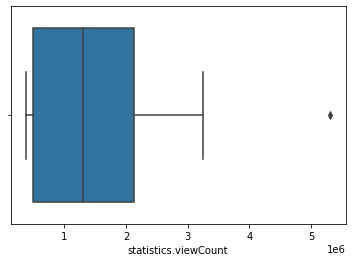

In [7]:
# Create a boxplot to find out the outlier
sns.boxplot(x=df_table["statistics.viewCount"].astype(int))

<h2> Using the IQR formula to get all the outliers and filter all of them out</h2>

In [8]:
# Get the value for 1st and 3rd quartile and 
# calculate IQR
quartile_1 = df_table["statistics.viewCount"].astype(int).quantile(q=0.25)
quartile_3 = df_table["statistics.viewCount"].astype(int).quantile(q=0.75)
IQR = quartile_3 - quartile_1
print(IQR)

1632517.25


In [9]:
# Calculate lower and upper Bound
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-1957414.375
4572654.625


In [10]:
# Using these calculations to filter out rows who are outlers
outside_upper = df_table['statistics.viewCount'].astype(int) > upper_bound
outside_lower = df_table['statistics.viewCount'].astype(int) < lower_bound
outliers_df = df_table[outside_upper | outside_lower]
outliers_df

,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.channelTitle,snippet.categoryId,snippet.liveBroadcastContent,snippet.defaultLanguage,snippet.localized.title,snippet.localized.description,snippet.defaultAudioLanguage,snippet.tags,statistics.viewCount,statistics.likeCount,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,category,Like_Percentage
6,ncvA8_H-wkQ,2020-11-22T17:19:41Z,UCo8bcnLyZH8tBIH9V1mLgqQ,I'm a Mobile Game,It's a great Christmas Present that you don't ...,TheOdd1sOut,23,none,Not Stated,I'm a Mobile Game,It's a great Christmas Present that you don't ...,en,"[mobile game, lets bounce, video game, theodd1...",5311313,269509,8939,0,42255,Comedy,5.074244


<h2>Data Aggregation</h2>
<ul>
<li>We can filter down the dataset by grouping it by common terms</li>
Eg. Grouping the dataset by language as they have a common viewerBase and
finding out the mean views
</ul>

In [24]:
# Group data by language and calculate mean
language_gb = df_table.groupby("snippet.defaultLanguage")
language_gb.mean()

,statistics.viewCount,Like_Percentage
snippet.defaultLanguage,,
Not Stated,1509646.30,9.086319
en,1833215.25,7.622431


<h1> Conclusion</h1>
<h2> With outlier detection , we can detect videos who do extremely well or videos that do very badly
so that we can make better decisions when creating videos on youtube when we study the characteristics of these videos